In [3]:
#PREPARAÇÃO DOS DADOS

#GridSearchCV aplica o cross validation
#Não iremos fazer para o Nayve Bayes pois não há parâmetros cruciais que definem um melhor modelo
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
import pickle
import numpy as np


with open('/content/credit.pkl', 'rb') as f:

  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [5]:
#FAZENDO O K-FOLD CROSS VALIDATION

#Primeiro, concatenar os dados de treinamento novamente

X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [37]:
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste), axis=0)
y_credit.shape

(2000,)

ÁRVORE DE DECISÃO - TUNING

In [ ]:
#Parametros a serem testados
parametros = {'criterion':['gini','entropy'],
              'splitter':['best', 'random'],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,5,10]
              }

In [ ]:
gridARVORE = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid=parametros)

In [ ]:
gridARVORE.fit(X_credit, y_credit)

melhoresParametros = gridARVORE.best_params_
melhorResultado = gridARVORE.best_score_

print(melhoresParametros)
print(melhorResultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


RANDOM FOREST - TUNING

In [ ]:
#Parametros a serem testados
parametros = {'criterion':['gini','entropy'],
              'n_estimators':[10,40,100,150],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,5,10]
              }

In [ ]:
gridRANDOMF = GridSearchCV(estimator = RandomForestClassifier(),param_grid=parametros)

In [ ]:
gridRANDOMF.fit(X_credit, y_credit)

melhoresParametros = gridRANDOMF.best_params_
melhorResultado = gridRANDOMF.best_score_

print(melhoresParametros)
print(melhorResultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.9865


KNN - TUNING

In [ ]:
parametros = {
    'n_neighbors' :[3,5,10,20],
    'p':[1,2] #1 para distancia Manhatan e 2 para Euclidiana
}



In [ ]:
gridKNN = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=parametros)

In [ ]:
gridKNN.fit(X_credit, y_credit)

melhoresParametros = gridKNN.best_params_
melhorResultado = gridKNN.best_score_

print(melhoresParametros)
print(melhorResultado) #NESTE CASO FOI PIOR QUE O QUE TESTAMOS (NEM SEMPRE ESTÁ CERTA)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


REGRESSÃO LOGISTICA - TUNING

In [ ]:
parametros = {
    'tol':[0.001, 0.0001,0.00001],
    'C':[1.0, 1.5, 2.0],
    'solver': ['lbfgs','sag','saga']

}

In [ ]:
gridLOGIS = GridSearchCV(estimator = LogisticRegression(),param_grid=parametros)

In [ ]:
gridLOGIS.fit(X_credit, y_credit)

melhoresParametros = gridLOGIS.best_params_
melhorResultado = gridLOGIS.best_score_

print(melhoresParametros)
print(melhorResultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.001}
0.9484999999999999


SVM - TUNING

In [ ]:
parametros = {
    'tol' :[0.001, 0.0001,0.00001],
    'C' : [1.0, 1.5, 2.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [ ]:
gridSVM = GridSearchCV(estimator = SVC(),param_grid=parametros)

In [ ]:
gridSVM.fit(X_credit, y_credit)

melhoresParametros = gridSVM.best_params_
melhorResultado = gridSVM.best_score_

print(melhoresParametros)
print(melhorResultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


MLP - TUNING

In [ ]:
parametros = {
    'activation':['relu', 'logistic', 'tahn'],
    'solver':['adam','sgd'],
    'batch_size':[10,56]
}

In [ ]:
gridMLP = GridSearchCV(estimator = MLPClassifier(),param_grid=parametros)

In [ ]:
gridMLP.fit(X_credit, y_credit)

melhoresParametros = gridMLP.best_params_
melhorResultado = gridMLP.best_score_



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
print(melhoresParametros)
print(melhorResultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9975000000000002


VALIDAÇÃO CRUZADA

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultadosArvore = []
resultadosRandom = []
resultadosKNN = []
resultadosLogistica = []
resultadosSVM = []
resultadosMLP = []


for i in range(30):
  #Shuffle para embaralhar os dados a cada teste
  kfold = KFold(n_splits=10,shuffle=True,random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy',min_samples_split=5,min_samples_leaf=1,splitter='best')

  scores = cross_val_score(arvore, X_credit, y_credit, cv= kfold)
  #print(scores) #CADA LINHA É UM VETOR COM O RESULTADO DOS 10 TESTES DIFERENTES
  #print(scores.mean())
  resultadosArvore.append(scores.mean())

  randomForest = RandomForestClassifier(criterion='entropy',min_samples_split=5,min_samples_leaf=1, n_estimators=10)
  scores = cross_val_score(randomForest, X_credit, y_credit, cv= kfold)
  resultadosRandom.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv= kfold)
  resultadosKNN.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv= kfold)
  resultadosLogistica.append(scores.mean())

  svm = SVC(kernel='rbf', C= 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv= kfold)
  resultadosSVM.append(scores.mean())

  MLP = MLPClassifier(activation='relu', batch_size=56, solver='adam')
  scores = cross_val_score(MLP, X_credit, y_credit, cv= kfold)
  resultadosMLP.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
import pandas as pd
resultados = pd.DataFrame({
    'arvore': resultadosArvore,
    'Random Forest': resultadosRandom,
    'KNN':resultadosKNN,
    'Logistica':resultadosLogistica,
    'SVM':resultadosSVM,
    'MLP':resultadosMLP
})

In [ ]:
resultados #ESTAMOS AVALIANDO SOMENTE A ACURÁCIA

,arvore,Random Forest,KNN,Logistica,SVM,MLP
0,0.9860,0.9830,0.9815,0.9475,0.9845,0.9980
1,0.9850,0.9825,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9855,0.9795,0.9470,0.9865,0.9965
3,0.9870,0.9825,0.9780,0.9460,0.9850,0.9965
4,0.9885,0.9845,0.9820,0.9465,0.9850,0.9980
5,0.9890,0.9840,0.9780,0.9465,0.9845,0.9970
6,0.9885,0.9855,0.9805,0.9470,0.9860,0.9970
7,0.9875,0.9855,0.9800,0.9480,0.9850,0.9970
8,0.9870,0.9805,0.9795,0.9465,0.9840,0.9965
9,0.9875,0.9855,0.9820,0.9465,0.9845,0.9970


In [ ]:
resultados.describe()
#STD = DESVIO PADRÃO
# MEAN = MÉDIA

,arvore,Random Forest,KNN,Logistica,SVM,MLP
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.984033,0.980050,0.946950,0.985083,0.996983
std,0.001897,0.001697,0.001533,0.000687,0.001280,0.000676
min,0.982500,0.980500,0.977000,0.945500,0.982000,0.995000
25%,0.986125,0.983000,0.979000,0.946500,0.984125,0.996500
50%,0.987250,0.984250,0.980000,0.947000,0.985000,0.997000
75%,0.988500,0.985500,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987000,0.982500,0.948500,0.987500,0.998000


In [ ]:
resultados.var() #VARIANCIA, MAS COMO O DESVIO PADRÃO JÁ UTILIZA DA VARIÂNCIA, É SOMENTE FEITO PARA FINS DE DETALHE

arvore           3.598851e-06
Random Forest    2.878161e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
MLP              4.566092e-07
dtype: float64

In [ ]:
(resultados.std() / resultados.mean()) * 100 #COEFICIENTE DE VARIAÇÃO EM PORCENTAGEM COM AS PROBABILIDADES

arvore           0.192160
Random Forest    0.172404
KNN              0.156446
Logistica        0.072517
SVM              0.129977
MLP              0.067777
dtype: float64

In [ ]:
#TESTE DE NORMALIDADE TESTE DE HIPÓTESES
#Teste de Shapiro

#VERIFICAR SE OS DADOS PERTENCEM A UMA DISTRIBUIÇÃO NORMAl
# SE FOR MAIOR OU IGUAL A ALPHA, PERTENCE A DISTRIBUIÇÃO
# SE FOR MENOR, NÃO PERTENCE
#Hipótese nula é que os dados estão na distribuição normal
#Hipótese alternativa é que não estão

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultadosArvore), shapiro(resultadosKNN), shapiro(resultadosLogistica), shapiro(resultadosMLP), shapiro(resultadosRandom), shapiro(resultadosSVM)

(ShapiroResult(statistic=0.9602885842323303, pvalue=0.3150746822357178),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9181652069091797, pvalue=0.024043118581175804),
 ShapiroResult(statistic=0.9537224173545837, pvalue=0.21245944499969482),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849))

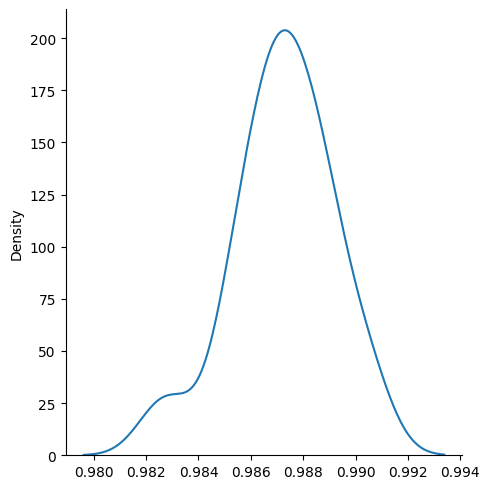

In [ ]:
import seaborn as sns
sns.displot(resultadosArvore, kind='kde') #POSSUI UMA DISTRIBUIÇÃO NORMAL

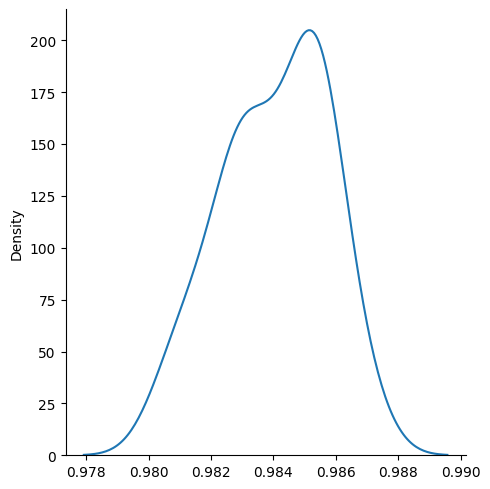

In [ ]:
sns.displot(resultadosRandom, kind='kde')#POSSUI UMA DISTRIBUIÇÃO NORMAL

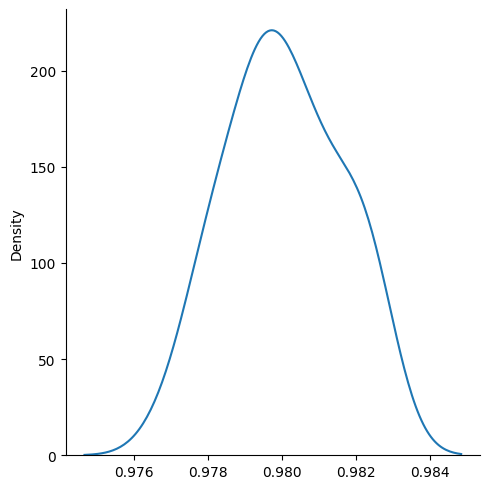

In [ ]:
sns.displot(resultadosKNN, kind='kde')#POSSUI UMA DISTRIBUIÇÃO NORMAL

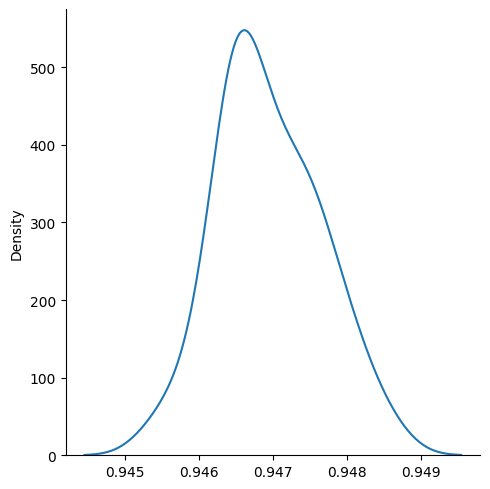

In [ ]:
sns.displot(resultadosLogistica, kind='kde')#POSSUI UMA DISTRIBUIÇÃO NORMAL

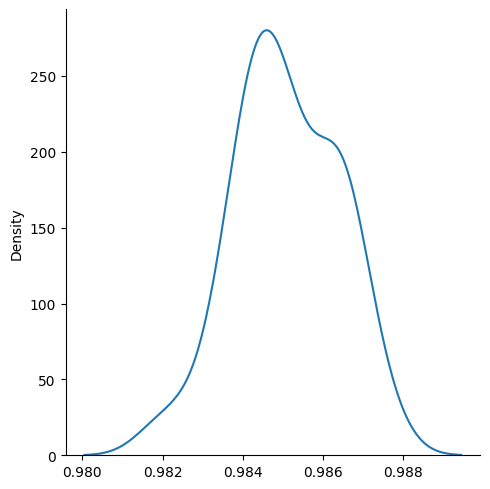

In [ ]:
sns.displot(resultadosSVM, kind='kde')#POSSUI UMA DISTRIBUIÇÃO NORMAL

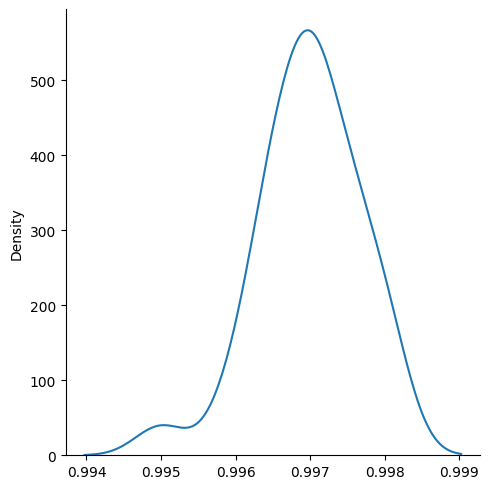

In [ ]:
sns.displot(resultadosMLP, kind='kde')

TESTE ANOVA E TURKEY

In [ ]:
from scipy.stats import f_oneway #USADO PARA VERIFICAR SE HÁ UMA DIFERENÇA ESTATÍSTICA ENTRE OS DADOS

In [ ]:
_, p = f_oneway(resultadosArvore, resultadosKNN, resultadosLogistica, resultadosMLP, resultadosRandom, resultadosSVM)

In [ ]:
p

2.984493869361908e-183

In [ ]:
alpha = 0.05

if p<= alpha:
  print("Hipótese nula rejeitada, os dados são diferentes")
else:
  print("Hipótese alternativa rejeitada, os resultados são iguais")

Hipótese nula rejeitada, os dados são diferentes


In [ ]:
resultadosAlgoritmos = {'accuracy':np.concatenate([resultadosArvore, resultadosKNN, resultadosLogistica, resultadosMLP, resultadosRandom, resultadosSVM]),
                        'algoritmo':
                         [
                             'arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                             'KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN',
                             'Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica','Logistica',
                             'MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP',
                            'random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random',
                             'SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM'
                        ]}

In [ ]:
resultadosDF = pd.DataFrame(resultadosAlgoritmos)

In [ ]:
resultadosDF

,accuracy,algoritmo
0,0.9860,arvore
1,0.9850,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9885,arvore
...,...,...
175,0.9820,SVM
176,0.9840,SVM
177,0.9865,SVM
178,0.9835,SVM


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
comparaAlgoritmos = MultiComparison(resultadosDF['accuracy'], resultadosDF['algoritmo'])

In [ ]:
testeEstatistico = comparaAlgoritmos.tukeyhsd()

In [ ]:
print(testeEstatistico)
#Coluna Reject indica que a hipótese nula está sendo rejeitada ( OU SEJA, EXISTE DIFERENÇA SIGNIFICANTE)
#Rejeitando a hipótese nula, os algoritmos possuem diferença significativa em seus resultados, implicando que um algoritmo é melhor que o outro

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
      KNN Logistica  -0.0331    0.0 -0.0341 -0.0321   True
      KNN       MLP   0.0169    0.0  0.0159   0.018   True
      KNN       SVM    0.005    0.0   0.004  0.0061   True
      KNN    arvore   0.0072    0.0  0.0062  0.0082   True
      KNN    random    0.004    0.0   0.003   0.005   True
Logistica       MLP     0.05    0.0   0.049  0.0511   True
Logistica       SVM   0.0381    0.0  0.0371  0.0392   True
Logistica    arvore   0.0403    0.0  0.0393  0.0413   True
Logistica    random   0.0371    0.0  0.0361  0.0381   True
      MLP       SVM  -0.0119    0.0 -0.0129 -0.0109   True
      MLP    arvore  -0.0097    0.0 -0.0108 -0.0087   True
      MLP    random   -0.013    0.0  -0.014 -0.0119   True
      SVM    arvore   0.0022    0.0  0.0011  0.0032   True
      SVM    random   -0.001 0.0413 -0.0021    -0.0   Tr

In [ ]:
resultados.mean()

arvore           0.987233
Random Forest    0.984033
KNN              0.980050
Logistica        0.946950
SVM              0.985083
MLP              0.996983
dtype: float64

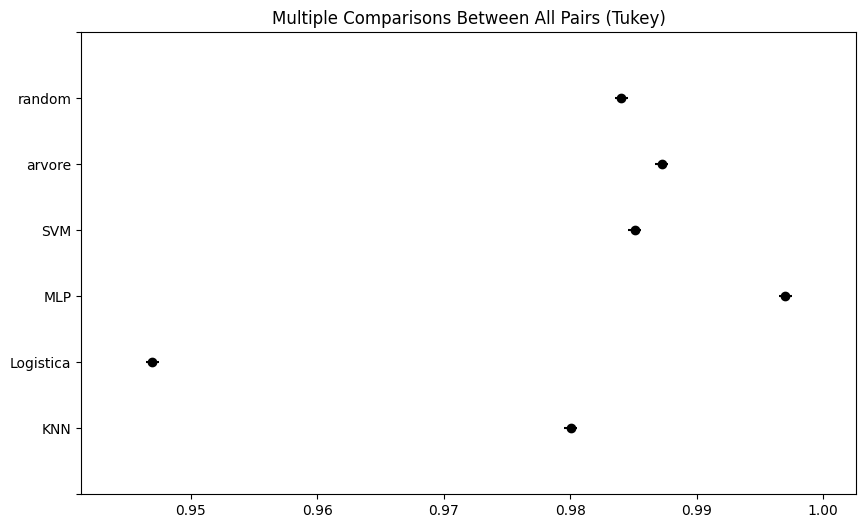

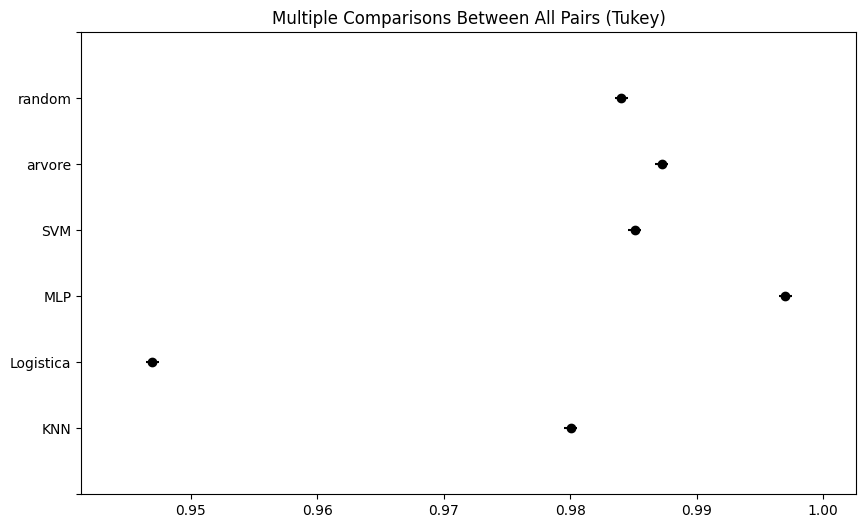

In [ ]:
testeEstatistico.plot_simultaneous()

SALVANDO OS MODELOS

In [39]:
#PARA O MODELO FINAL, PODEMOS USAR A BASE TODA
classificadorMLP = MLPClassifier(activation='relu',batch_size=56, solver='adam')
classificadorMLP.fit(X_credit, y_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [40]:
classificadorArvore = DecisionTreeClassifier(criterion='entropy',min_samples_split=5,min_samples_leaf=1,splitter='best')
classificadorArvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [41]:
classificadorSVM = SVC(kernel='rbf', C= 2.0, probability=True)
classificadorSVM.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [42]:
import pickle

pickle.dump(classificadorMLP, open('redeNeuralFinal.sav','wb'))
pickle.dump(classificadorArvore, open('arvoreFinal.sav','wb'))
pickle.dump(classificadorSVM, open('SVMFinal.sav','wb'))

CARREGANDO OS MODELOS

In [43]:
import pickle
redesMLP = pickle.load(open('redeNeuralFinal.sav','rb'))
svmCarregado = pickle.load(open('SVMFinal.sav','rb'))
arvoreCarregada = pickle.load(open('arvoreFinal.sav','rb'))

In [44]:
novoRegistro = X_credit[1999]
novoRegistro = novoRegistro.reshape(1,-1) #Necessário para rodar
novoRegistro.shape

(1, 3)

In [45]:
novoRegistro

array([[-1.03572293, -0.93978122,  0.04244312]])

In [46]:
respostas = []
respostas.append(redesMLP.predict(novoRegistro)) #resultado zero (ou seja, paga o emprestimo)
respostas.append(svmCarregado.predict(novoRegistro))
respostas.append(arvoreCarregada.predict(novoRegistro))

In [47]:
respostas

[array([1]), array([1]), array([1])]

COMBINANDO CLASSIFICADORES

In [48]:
paga = 0
naoPaga = 0
if respostas[0][0] == 1:
  naoPaga +=1
else:
  paga +=1

if respostas[1][0] == 1:
  naoPaga +=1
else:
  paga +=1

if respostas[2][0] == 1:
  naoPaga +=1
else:
  paga +=1

if paga > naoPaga:
  print('Cliente pagará o emprestimo')

elif paga == naoPaga:
  print('Empate')
else:
  print('Cliente não pagará')

Cliente não pagará


REJEIÇÃO DE CLASSIFICADORES

In [49]:
probabilidadeMLP = redesMLP.predict_proba(novoRegistro)
probabilidadeMLP

array([[7.55702472e-05, 9.99924430e-01]])

In [50]:
confiancaMLP = probabilidadeMLP.max()
confiancaMLP

0.9999244297528327

In [51]:
probabilidadeArvore = arvoreCarregada.predict_proba(novoRegistro)
confiancaArvore = probabilidadeArvore.max()
confiancaArvore

1.0

In [52]:
probabilidadeSVM = svmCarregado.predict_proba(novoRegistro)
confiancaSVM = probabilidadeSVM.max()
confiancaSVM

0.9931507871516799

In [53]:
paga = 0
naoPaga = 0
confMinima = 0.999999
algoritmos = 0

if confiancaMLP >=confMinima:
  algoritmos +=1
  if respostas[0][0] == 1:
    naoPaga +=1
  else:
    paga +=1

if confiancaArvore >=confMinima:
  algoritmos +=1
  if respostas[1][0] == 1:
    naoPaga +=1
  else:
    paga +=1

if confiancaSVM >=confMinima:
  if respostas[2][0] == 1:
    naoPaga +=1
  else:
    paga +=1

if paga > naoPaga:
  print('Cliente pagará o emprestimo, baseado em {} algoritmos'.format(algoritmos))

elif paga == naoPaga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagará, baseado em {} algoritmos'.format(algoritmos))

Cliente não pagará, baseado em 1 algoritmos
